In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


## 모델을 만드는 함수 정의 

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit() 메서드의 결과를 history 변수에 담기

"""
verbose 매개변수는 훈련 과정을 조절한다. 
기본값 1
2로 설정하면 진행 막대를 빼고 출력
"""

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) 


In [ ]:
print(history.history.keys()) # 훈련 측정값이 담겨 있는 history 딕셔너리

dict_keys(['loss', 'accuracy'])


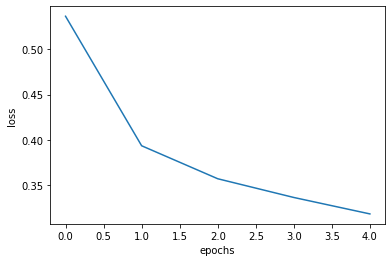

In [ ]:
# 손실값 출력
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

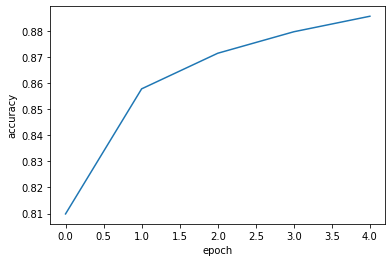

In [ ]:
# 정확도 출력
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

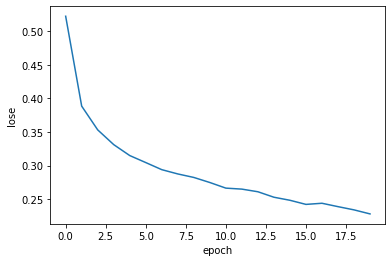

In [ ]:
# 에포크를 늘린 후 손실 그래프 그리기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('lose')
plt.show()

**인공 신경망 모델이 최적화 하는 대상은 정확도가 아니라 손실 함수이다.** 

In [ ]:
# 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


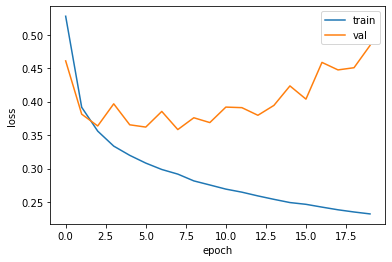

In [ ]:
# 훈련 손실과 검증 손실을 한 그래프에 그리기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증세트에 대한 정확도도 증가할 것이다.**

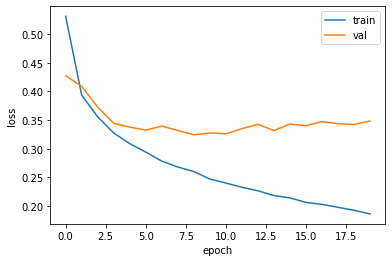

In [ ]:
"""
  기본 RMSprop 옵티마이저는 많은 문제에서 작동한다.
  기본 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋다.
  Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.
"""

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭 아웃
**훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼(즉. 뉴련의 출력을 0으로 만든다) 과대적합을 막는다.**

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


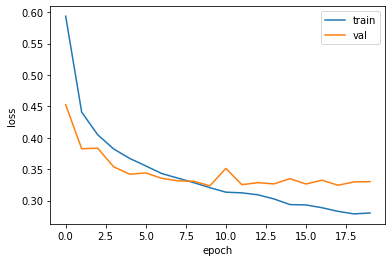

In [ ]:
"""
  평과와 예측에 모델을 사용할 때는 드롭아웃이 적용되지 않는다.
"""

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 위 그래프에서 10번째가 넘어가면 다소 과대적합이기에 epoch를 10번으로 맞추고 다시 실행

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

* 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공한다.
* 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장
* 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.

In [ ]:
model.save_weights('model-weights.h5')

* 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공
* 기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장
* 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 May 25 07:29 model-weights.h5
-rw-r--r-- 1 root root 982664 May 25 07:31 model-whole.h5


In [ ]:
# 첫 번째 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어 사용
# 두 번째 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5') #load_weights 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 한다.

**모델 파라미터를 읽은 후 evaluate() 메서드를 사용하여 정확도를 출력할 수 있다.**

* evaluate() 메서드는 손실을 계산하기 위해 반드시 먼저 compile() 메서드를 실행

In [ ]:
# 배열에서 가장 큰 값의 인덱스를 반환하는 함수 argmax()
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # axis가 -1이면 마지막 차원을 따라 최대값을 고른다.
print(np.mean(val_labels == val_target))

0.87875


In [ ]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8788


[0.32693567872047424, 0.8787500262260437]

**두 모델을 한 번에 훈련하는 콜백**

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
chechpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[chechpoint_cb])

In [ ]:
# load_model() 함수로 다시 읽어 예측

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8861


[0.3361426293849945, 0.8860833048820496]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

12


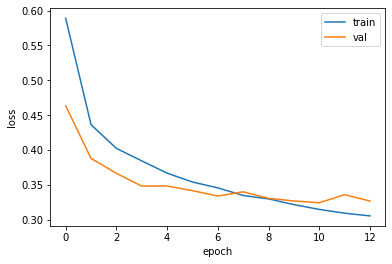

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8828


[0.3241666555404663, 0.8828333616256714]